In [ ]:
# Installing Transformer Libraries

!pip install transformers

In [ ]:
# Web links Handler
import requests

# Backend
import torch

# Image Processing
from PIL import Image

# Transformer and pre-trained Model
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast

# Managing loading processing
from tqdm import tqdm

# Assign available GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Loading a fine-tuned image captioning Transformer Model

# ViT Encoder-Decoder Model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)

# Corresponding ViT Tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Image processor
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

In [ ]:
# Accesssing images from the web
import urllib.parse as parse
import os
# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

In [ ]:
# Image inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)

    # Preprocessing the Image
    img = image_processor(image, return_tensors="pt").to(device)

    # Generating captions
    output = model.generate(**img)

    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]

    return caption

In [ ]:
#  Image media display
from IPython.display import display

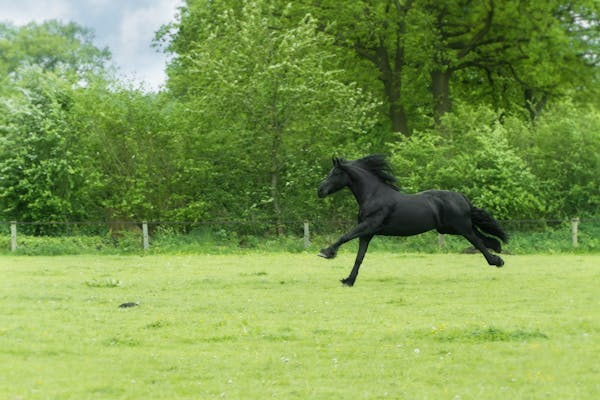

a black horse running through a grassy field 


In [ ]:
# Loading URLs
url = "https://images.pexels.com/photos/101667/pexels-photo-101667.jpeg?auto=compress&cs=tinysrgb&w=600"

# Display Image
display(load_image(url))

# Display Caption
print(get_caption(model, image_processor, tokenizer, url))